In [4]:
#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.
!pip install deap
import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    random.seed(64)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=40,
                                   stats=stats, halloffame=hof, verbose=True)

    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()

gen	nevals	avg    	std    	min	max
0  	300   	50.4933	5.33822	34 	64 
1  	240   	54.7533	4.20307	45 	65 
2  	254   	58.3967	3.47745	49 	67 
3  	257   	61.16  	3.45848	51 	69 
4  	246   	63.6433	3.12348	55 	75 
5  	267   	65.7933	3.24817	57 	76 
6  	250   	68.2367	3.28238	54 	76 
7  	254   	70.64  	3.15548	59 	79 
8  	247   	72.6533	3.10051	62 	80 
9  	257   	74.85  	3.05737	66 	83 
10 	237   	76.6767	3.02965	65 	85 
11 	261   	78.8633	2.93678	70 	86 
12 	247   	80.7833	2.75252	71 	88 
13 	258   	82.4067	2.69715	75 	91 
14 	251   	83.78  	3.02516	75 	91 
15 	253   	85.3567	2.91023	76 	93 
16 	261   	86.8767	2.73888	77 	93 
17 	252   	88.0133	2.61531	79 	95 
18 	259   	89.3467	2.57937	77 	95 
19 	268   	90.4133	2.64118	80 	96 
20 	232   	91.4467	2.53518	82 	97 
21 	263   	92.3967	2.52309	82 	97 
22 	255   	93.3733	2.33394	86 	98 
23 	263   	94.6033	2.09904	87 	98 
24 	248   	95.1867	2.38715	87 	99 
25 	251   	95.8067	2.48783	86 	100
26 	254   	96.63  	2.37622	86 	99 
27 	246   	97.1133	2

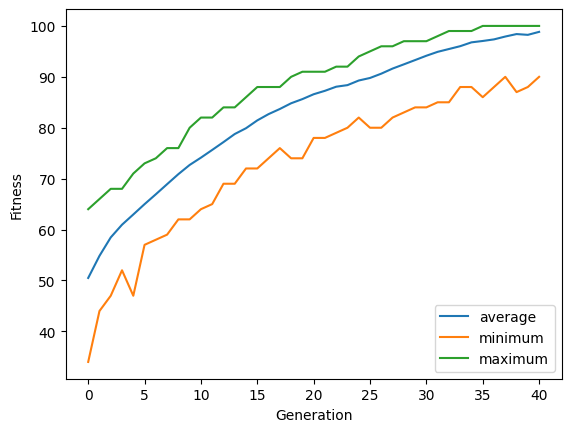

In [2]:
import matplotlib.pyplot as plt
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()